<!--start-block-->
<hr style="height: 1px;">
<i>This notebook was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 1: Probability Distributions, Simple Plots, and Expectation Values</h1>

<br>

<!--start-block-->
<a name='section_1_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.0 Overview</h2>

<h3>Navigation</h3>
          
<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_1">L1.1 Arrays, Functions, and Simple Plots</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_1">L1.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_2">L1.2 Simulated Data and Histograms</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_2">L1.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_3">L1.3 Sampling Events</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_3">L1.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_4">L1.4 Expectation and Variance</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_4">L1.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_5">L1.5 Sum of Two Distributions Continued</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_5">L1.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_6">L1.6 Generalizing to Many Measurements</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_6">L1.6 Exercises</a></td>
    </tr>
</table>

<!--end-block-->

<h3>Summary</h3>
<!--### Sections and Problems-->


**L1.1 Arrays, Functions, and Simple Plots**
<ul>
    <li>create simple arrays and functions</li>
    <li>introduce probability distributions</li>
    <li>make simple plots</li>
</ul>

**L1.2 Simulated Data and Histograms**
<ul>
    <li>simulate data by randomly sampling from probability distributions</li>
    <li>create histograms from randomly sampled data</li>
</ul>

**L1.3 Sampling Events**
<ul>
    <li>investigate the sum of randomly sampled data</li>
    <li>introduce the cumulative distribution function</li>
</ul>

**L1.4 Expectation and Variance**
<ul>
    <li>define the expectation and variance of a distribution</li>
</ul>

**L1.5 Generalizing to Many Measurements**
<ul>
    <li>consider sampling from the same distribution many times</li>
</ul>

<h3>Welcome!</h3>

Welcome to Datascience in physics! This course will cover the core topics of how to analyze modern physics data. We assume basic familiarity with Python and the Jupyter notebook platform, but otherwise most of the background you'll need will be here.

<h3>Importing Libraries</h3>

<b>If starting a new session somewhere other than at the beginning of this notebook, don't forget to run the code cell that imports libraries!</b>

As discussed in the introductory material, the programs you will run in this course use a variety of code libraries. In order to access these libraries and define the corresponding names, you will see a code section similar to the one below at the start of every course notebook. You will need to run this code only once per session. 

When running in Colab, you can check if you need to run it again by hovering your cursor over the run button. The popup window will tell you if that code has not been run during your current session.

In [85]:
#>>>RUN: L1.0-runcell01

"""
This code needs to be run once per session. If you get an error message of the form:

--NameError: name 'np' is not defined--

when running a later code segment, that means that this initialization code needs to be run.
"""

#import sys
#we will install the core packages here
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy

#to load python packages, simply import them (with optional nicknames)
import numpy as np                 #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import scipy.stats as stats        #https://docs.scipy.org/doc/scipy/reference/stats.html
import csv                         #https://docs.python.org/3/library/csv.html 

<h3>Setting Default Figure Parameters</h3>

As will be discussed in the first section, you should set appropriate sizes for titles, labels, and axes markers in your plots. The following code cell sets default values for figure parameters.

In [86]:
#>>>RUN: L1.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<!--start-block-->
<a name='section_1_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.1 Arrays, Functions, and Simple Plots</h2>    
    
| [Top](#section_1_0) | [Previous Section](#section_1_0) | [Exercises](#exercises_1_1) | [Next Section](#section_1_2) |

*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS1/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS1_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Making Plots</h3>

Before we do anything substantial, let's walk through how to make a plot. Plots are the bread and butter of data science; it's helpful to see a plot when we first acquire data, and often we present processed data as plots.

There are many libraries for plotting, but for this course, we will use Python with the popular `numpy`,  <a href="https://matplotlib.org/stable/users/index.html" target="_blank">`matplotlib`</a>, and <a href="https://docs.scipy.org/doc/scipy/reference/stats.html" target="_blank">`scipy.stats`</a> libraries.

So for starters, we need something to plot. Since we don't have data yet, we'll make some up. Here's a good chance for `numpy` practice!

As you saw in previous practice sections, `numpy` implements functions that can be run on arrays of objects or that have arrays as their output. Let's see an example, where we make an array of numbers and evaluate it with the `sin()` function (i.e., make a new array that is the sine of those numbers):

In [90]:
#>>>RUN: L1.1-runcell01

x = np.linspace(start=-4, stop=4, num=5) # make an array of 5 numbers, evenly spaced from -4 to 4
y = np.sin(x) # take the sine of each element of x, to get a new array, y

print("x: ", x)
print("y: ", y)

#Try changing the array to include the range [-10,10]

x:  [-4. -2.  0.  2.  4.]
y:  [ 0.7568025  -0.90929743  0.          0.90929743 -0.7568025 ]


Hopefully that worked for you! As is usual in scientific computation, the `np.sin` function assumes radians as its input. 

To see a case where the answers will be more familiar to you, try using  `np.pi` or `math.pi` to generate the value $\pi$ for the start and stop values. Note that, because of the precision of floating point numbers in Python, the sin of $\pi$ generated in this way is not exactly zero.

Now we can try plotting these two arrays `x` and `y` as if they were data. To do this quickly, we can use the `.plot()` function from `matplotlib.pyplot` (which we imported as `plt`). Note that the default plot size was already set in the last line of the code segment above that imported libraries.

You will see that that none of the code that you ran to generate the arrays `x` and `y` appears in the following code segment. This is one of the advantages of Juypter notebooks. As you saw for importing libraries, everything that is run in a single notebook session functions as if you were executing these code segments sequentially within a single Python session.

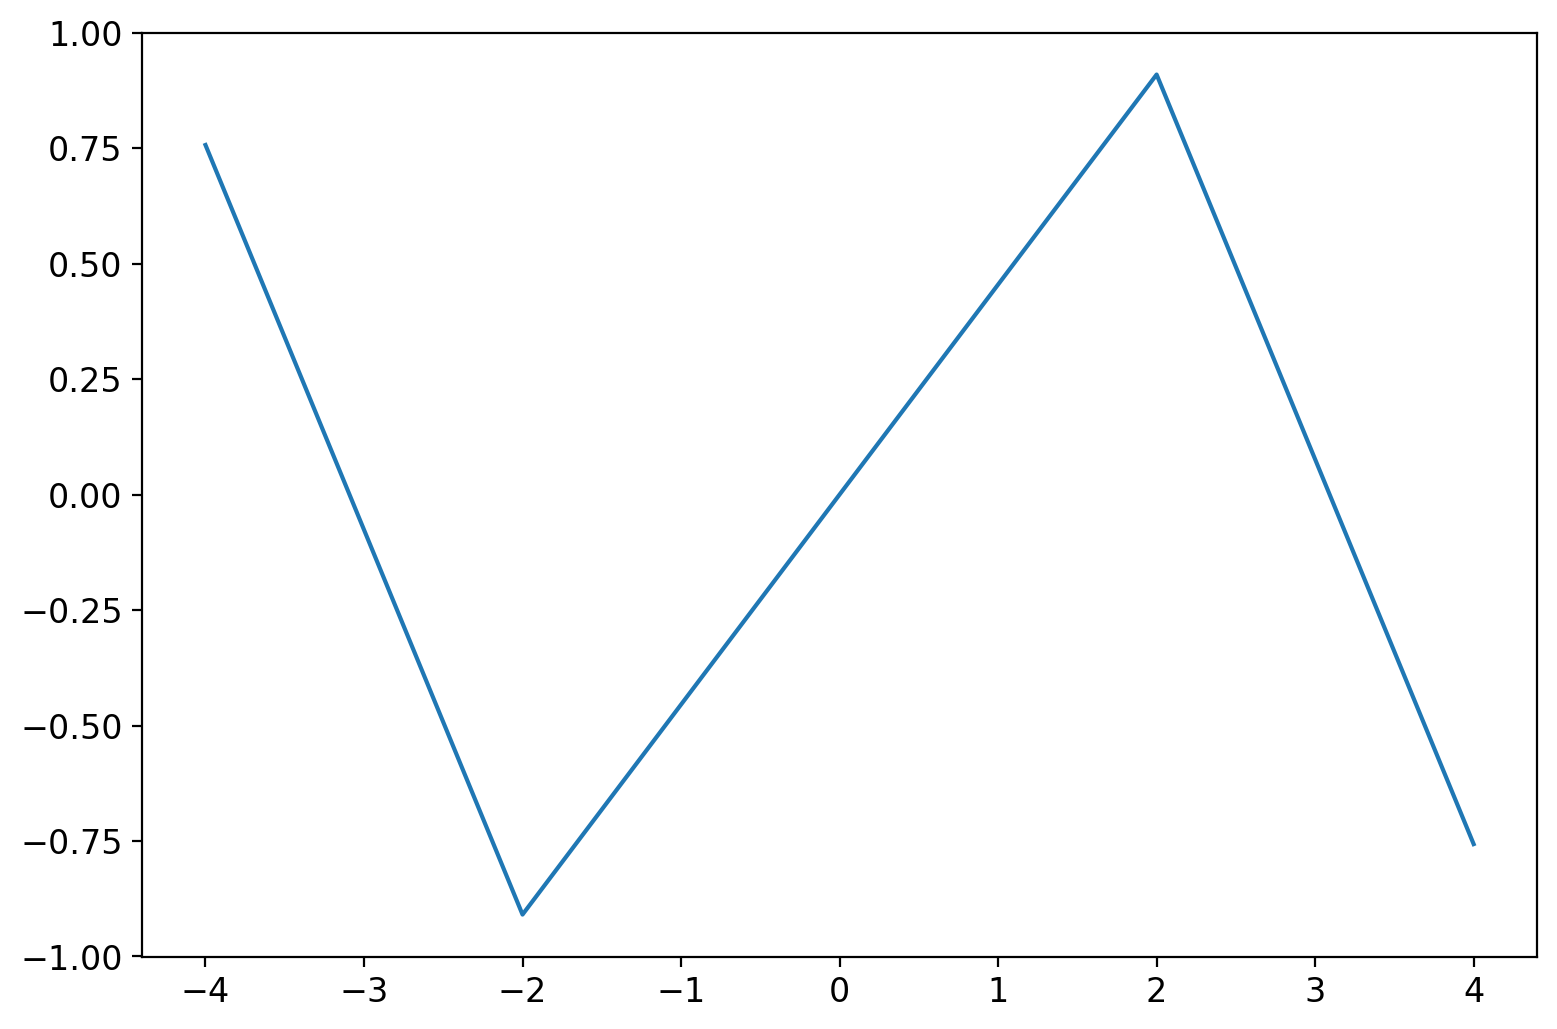

In [91]:
#>>>RUN: L1.1-runcell02

plt.plot(x, y, label='sin') # initialize the plot
plt.show() # put on screen

Ok, now let's plot a few distributions, a sine, a cosine, and a normal distribution generated using the `scipy` stats function. Note that we did not import the entire `scipy` library, just the `scipy.stats` functions. 

To get smoother looking plots, we now generate an array with 100 points instead of just 5. Importantly, we also label everything to ensure that the plot is more readable. As you can see above, a plot generated with just the `pt.plot()` and `pt.show()` commands has numerical labels on the axes but nothing else.

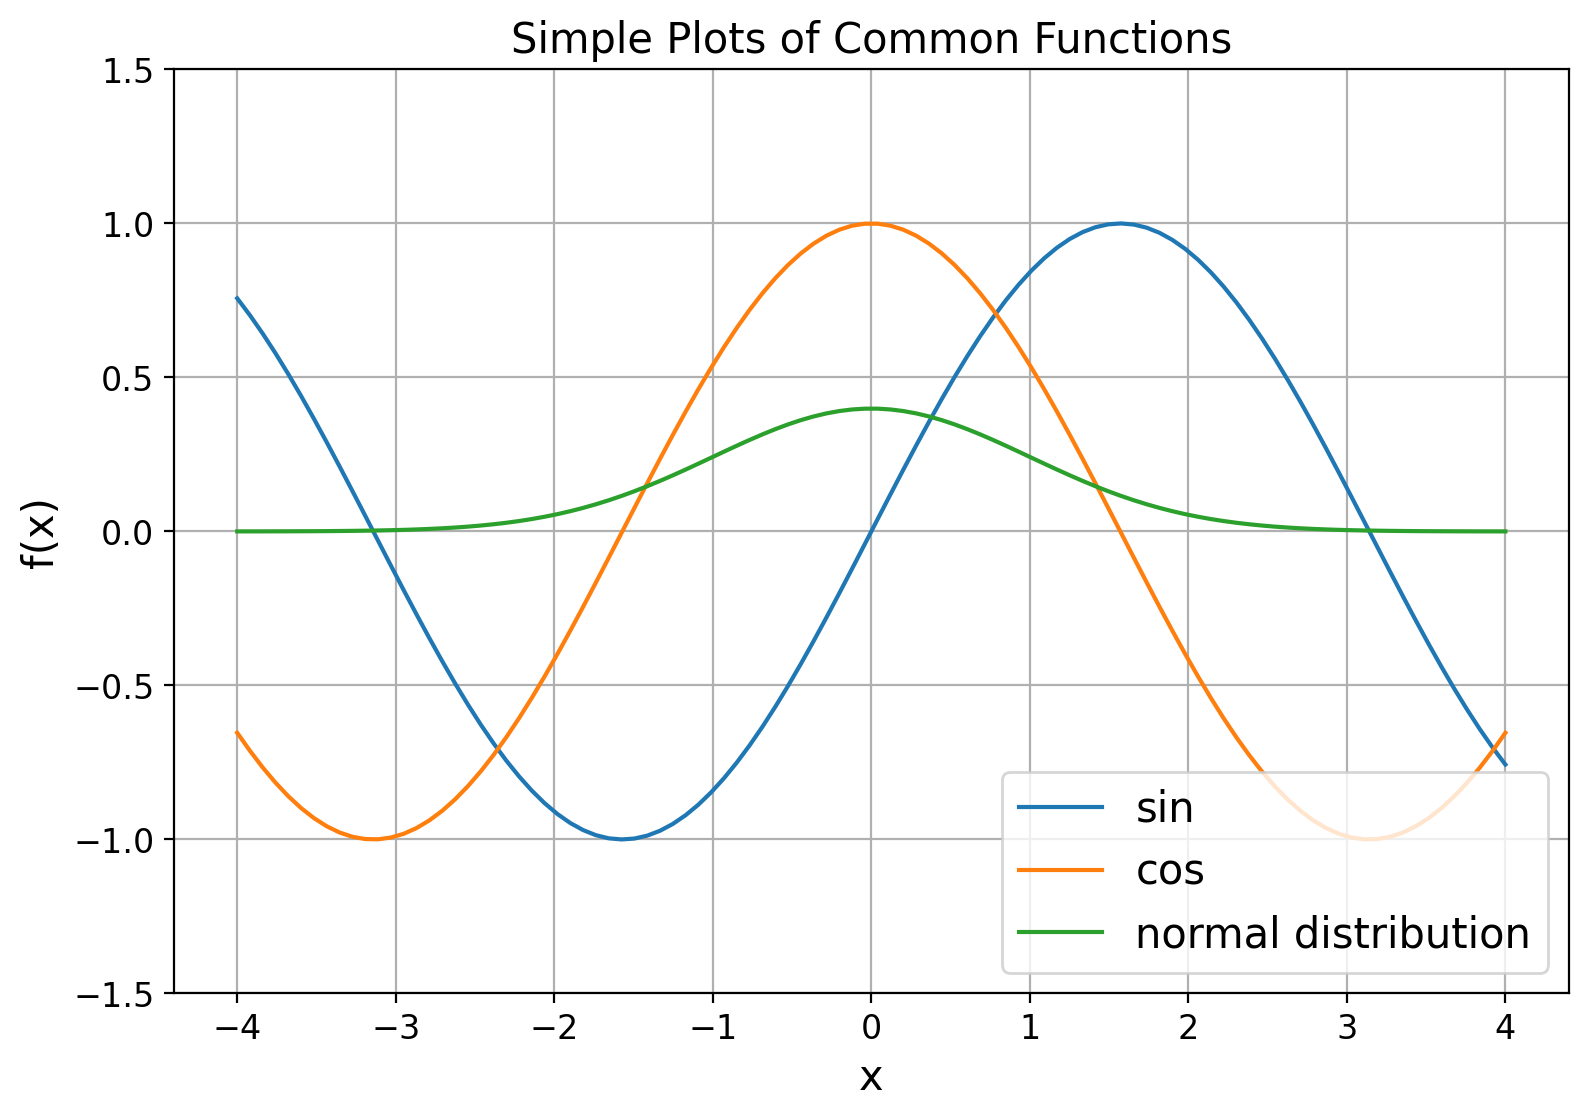

In [96]:
#>>>RUN: L1.1-runcell03

#First we define an array for our x data 
x = np.linspace(start=-4, stop=4, num=100)

#evaluate the data using a normal distribution from scipy
mu = 0
std = 1
y = stats.norm.pdf(x, mu, std) 


#plotting-------------------
#plot size
#fig, ax = plt.subplots(figsize=(9,6)) #optionally set the figure size here

#plot data
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.plot(x, y,label='normal distribution')

#plot labels and style
plt.title('Simple Plots of Common Functions', fontsize=15)
plt.legend(loc='lower right', fontsize = 15)
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.ylim(-1.5,1.5)

# changing the fontsize of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# a grid
plt.grid()
plt.show()

While it's not the focus of this course, it is important to follow *good plotting etiquette* when you generate a final plot.

In particular, you should:

- Label all axes
- Label all lines with a legend (if more than one)
- Make sure the plot is readable:
 - The axis ranges are the right size so the plot is not cut off and also does not have excess empty space around the edges
 - A grid aligned with the tick marks makes it easy to read off values from the plot, but it optional


This makes it much easier for other people to understand what you're showing! 


<a name='exercises_1_1'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_1) | [Next Section](#section_1_2) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.1.1: Exponential Function</span>

Define a function that returns the exponential of an array, using numpy.

To check your answer, see if the output of your function `exp_func(x)` is equal to `e` for `x=1`. The "starting" code cell below includes a line at the end which does this check for you. This "check" is not graded.

**Note:** Checks like this will **not** be included in the "starting" code for many of the problems in this course. While drafting your answers, you will need to think of the best way to do these checks yourself. Consider how to determine whether your code is correct.

**Reminder:** You can edit or create and then run code cells in this notebook in order to help you find a solution to all of the problems in this course. However, your final answers **must** always be submitted on MITx.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return ### Insert code here


if exp_func(1) == 2.718281828459045:
    print('correct')
else:
    print('incorrect')

In [97]:
#>>>SOLUTION

def exp_func(x):
    return np.exp(x)


if exp_func(1) == 2.718281828459045:
    print('correct')
else:
    print('incorrect')

correct


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**EXPLANATION:**
    
This exercise gets us to practice calling numpy functions,
as well as creating user-defined functions.
    
Assuming you've made something like our solution, you're probably wondering what the point is. We've made a new function that *only* calls another function, `numpy.exp`. As it stands, anywhere where we use our `exp_func`, we could just use `np.exp` instead.

The point is practice, of course. However, it can also occasionally be useful to make a *wrapper* function like this if you want `exp_func` to have some additional behavior on top of `np.exp`. For example, you could add some checks on the value of `x` to avoid error messages.

    
</div>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.1.2: Plotting Etiquette</span>

Which of the following functions will generate a plot that satisfies all criteria of good plotting etiquette? Try running each function in your Jupyter notebook.

**Note:** This code uses your previously defined exponential function. If you are starting a new session with this exercise, you **must** rerun that code to redefine it.

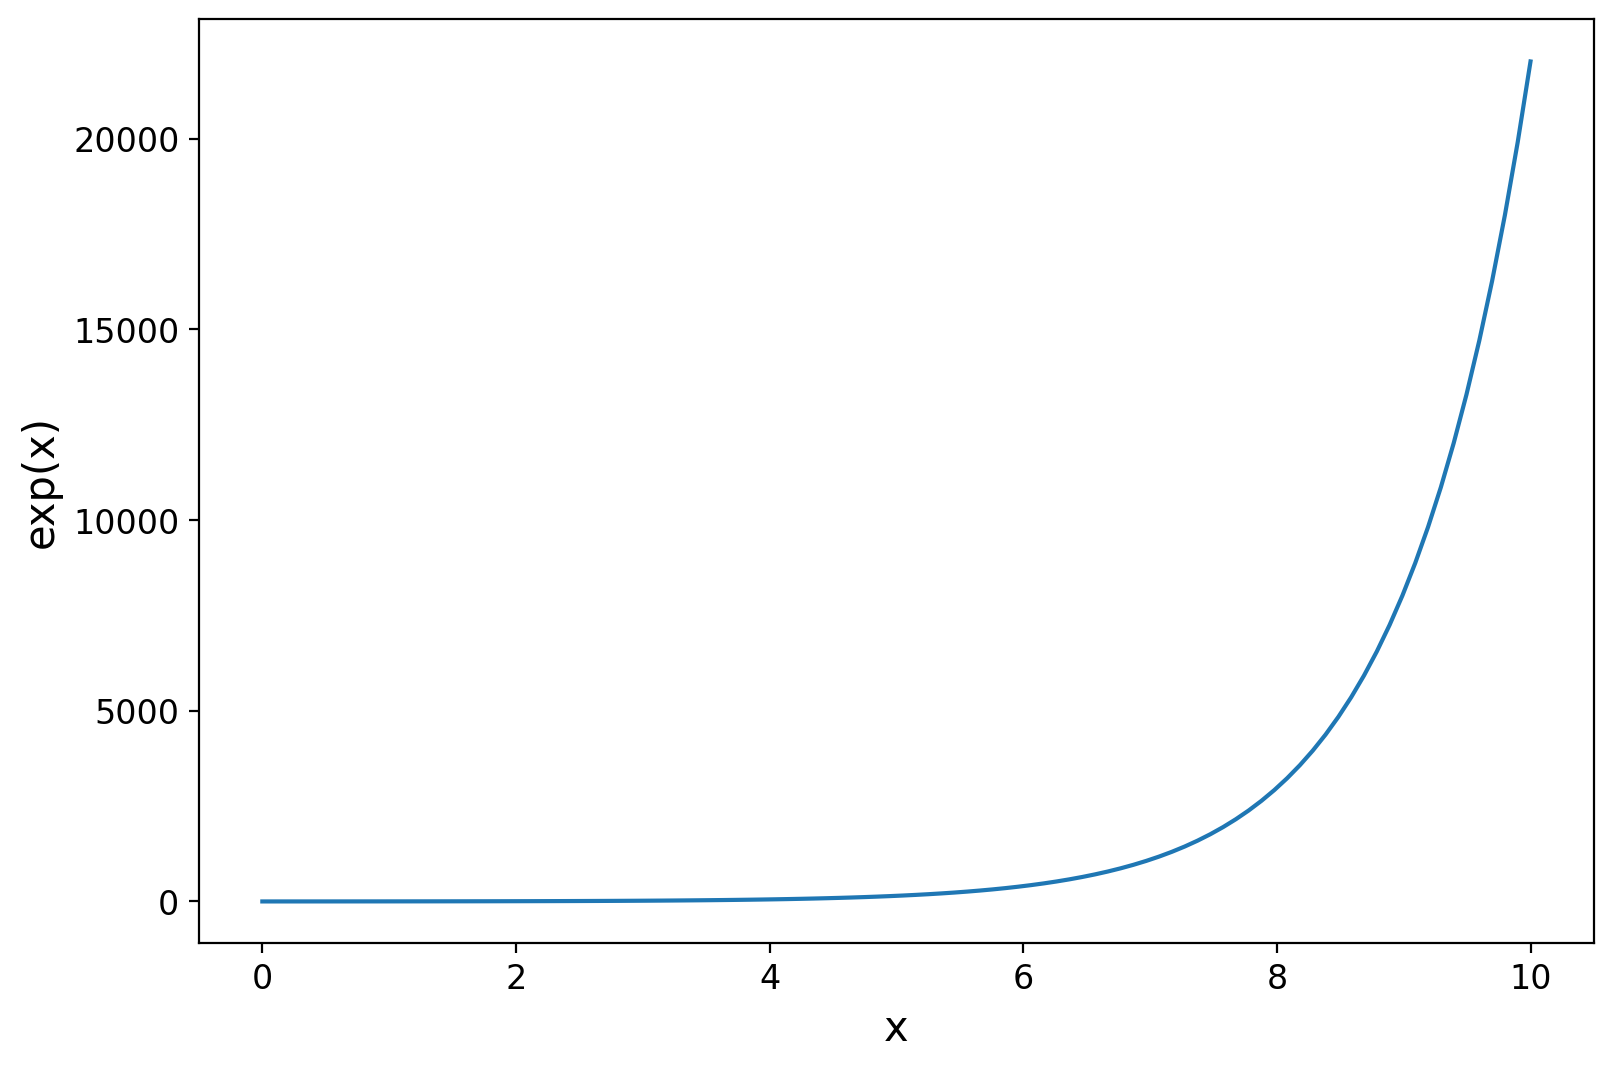

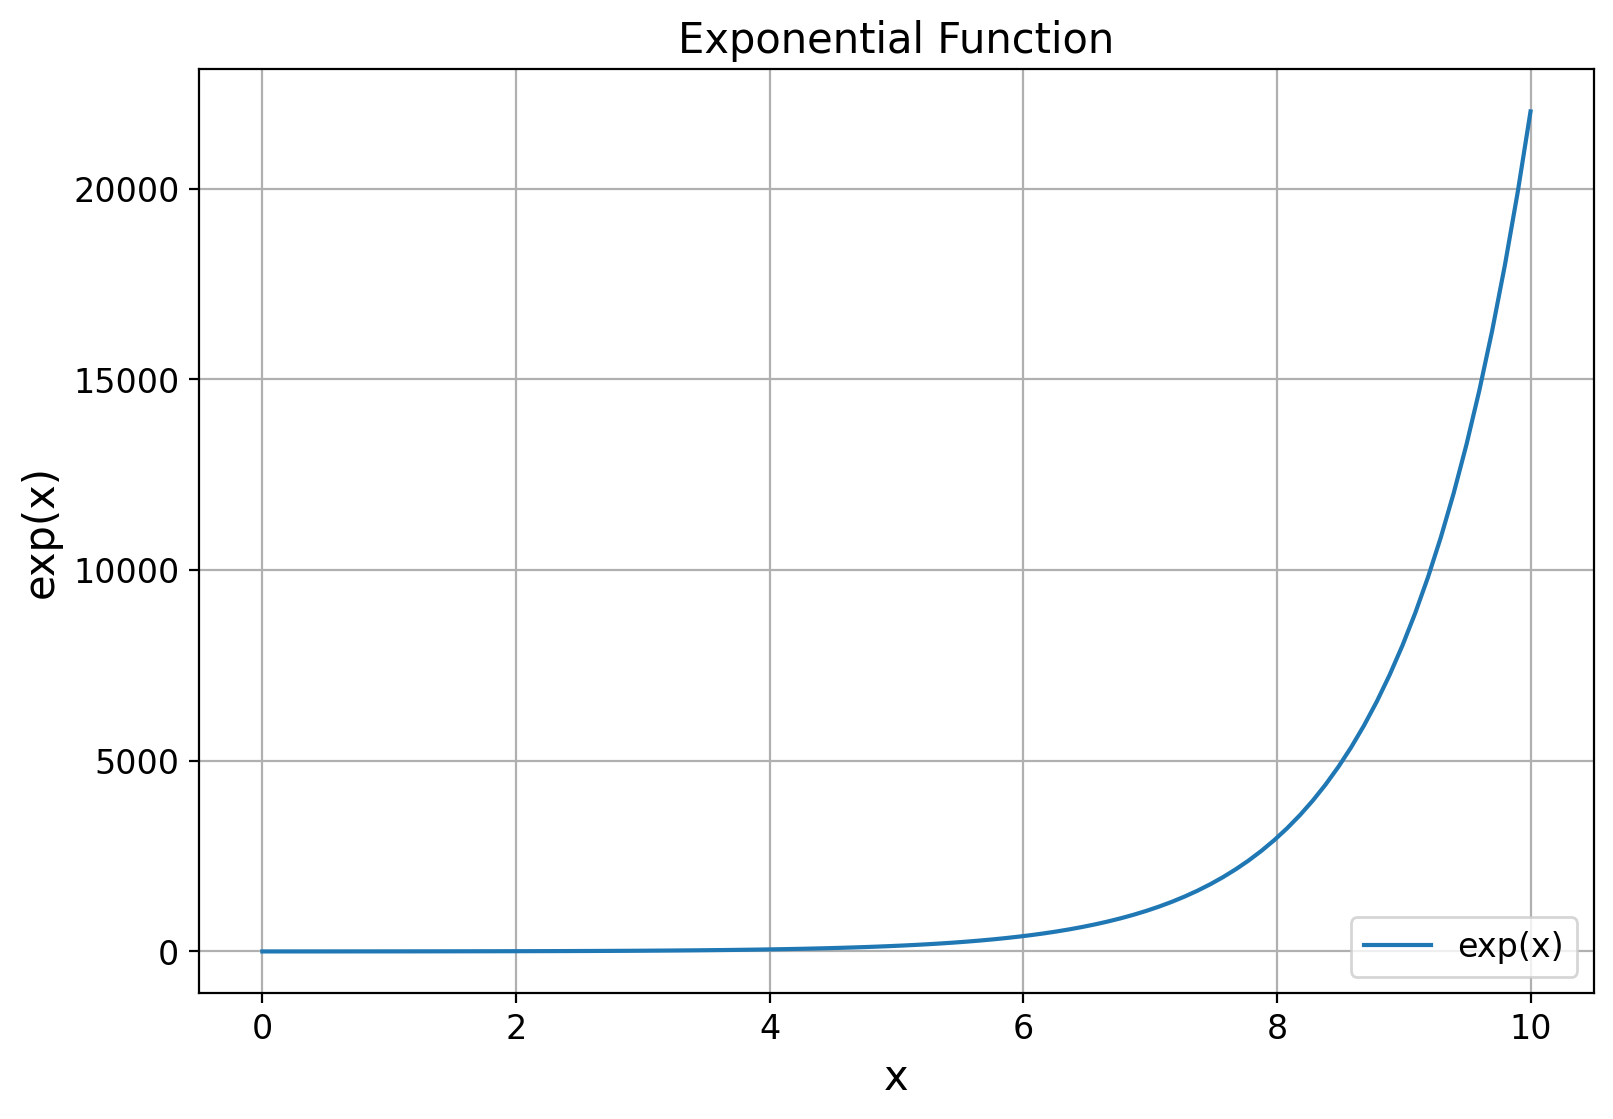

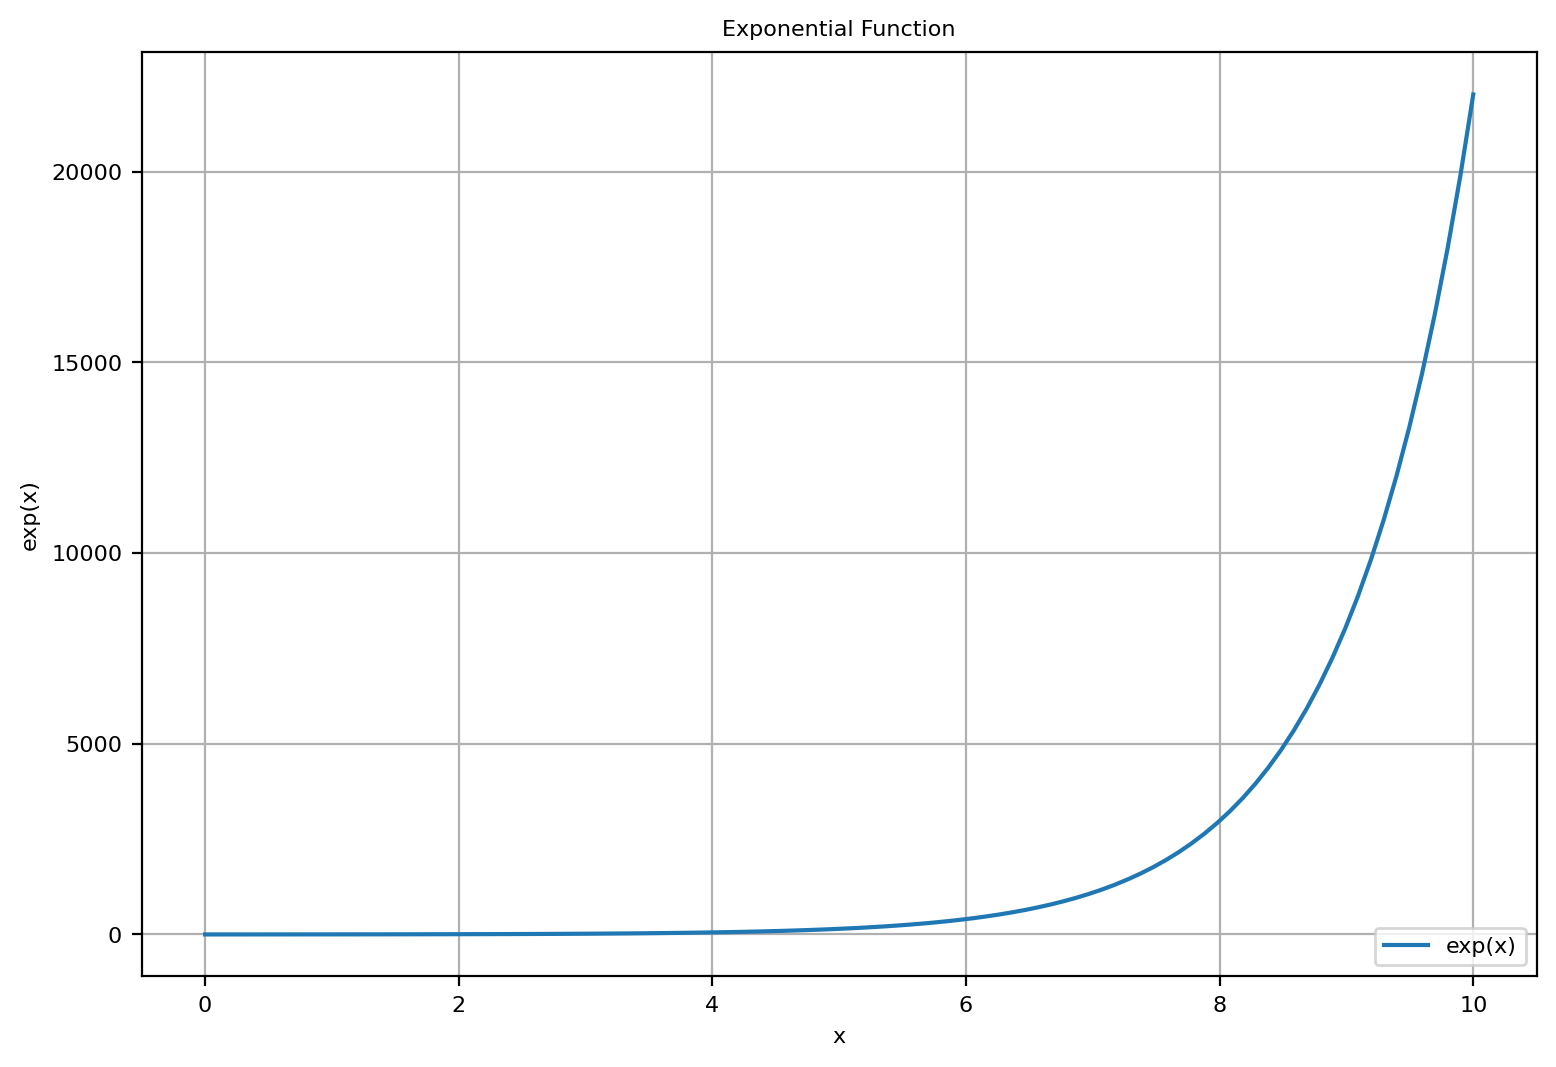

In [98]:
#>>>EXERCISE

def plot1(x):
    #plotting-------------------
    #plot data
    plt.plot(x, exp_func(x))

    #plot labels and style
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('exp(x)', fontsize=15)#Label y

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.show()
    

def plot2(x):
    #plotting-------------------
    #plot data
    plt.plot(x, exp_func(x), label='exp(x)')

    #plot labels and style
    plt.title('Exponential Function', fontsize=15)
    plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('exp(x)', fontsize=15)#Label y

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()
    
    
def plot3(x):
    #plotting-------------------
    #plot data
    plt.plot(x, exp_func(x), label='exp(x)')

    #plot labels and style
    plt.title('Exponential Function', fontsize = 8)
    plt.legend(loc='lower right', fontsize = 8)
    plt.xlabel('x', fontsize=8) #Label x
    plt.ylabel('exp(x)', fontsize=8)#Label y

    # changing the fontsize of ticks
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # a grid
    plt.grid()
    plt.show()


x = np.linspace(start=0, stop=10, num=100)
plot1(x)
plot2(x)
plot3(x)

In [ ]:
#>>>SOLUTION

def plot2(x):
    #plotting-------------------
    #plot data
    plt.plot(x, exp_func(x), label='exp(x)')

    #plot labels and style
    plt.title('Exponential Function', fontsize=15)
    plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('exp(x)', fontsize=15)#Label y

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()
    
    
x = np.linspace(start=0, stop=10, num=100)
plot2(x)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
plot2()
</pre>
        
**EXPLANATION:**
    
This plot has a title and legend as well as appropriately sized axis titles and labels.
    
You can define the default sizes of plot parameters with the following lines, which we have done at the top of this notebook:
    
<pre>
medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title
</pre>
    
</div>

>#### Follow-up 1.1.1a (ungraded)
>   
>Change the range of the plot and/or try plotting with a different number of data points.

<!--start-block-->
<a name='section_1_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.2 Simulated Data and Histograms</h2>
    
| [Top](#section_1_0) | [Previous Section](#section_1_1) | [Exercises](#exercises_1_2) | [Next Section](#section_1_3) |

</br>

*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS1/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS1_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

The next concept that we need to understand is a histogram. A histogram is just a sum of the number of data points that fall within a specific range of x, called a "bin." We can compute it using the ```np.histogram``` function. This outputs an array with the number of data points per bin along with the edges of the bin. 

To fill this histogram, we will generate a set of random values (or events). We will use the `np.random.uniform` function, which generates random numbers from a uniform distribution. (Alternatively, you can comment out the `np.random.uniform` line and uncomment the line using `np.random.normal` for a normal distribution.) Then we will fill a 20-bin histogram with this information. 

<h3>Generating Random Numbers</h3>

It's impossible for any computer program to generate truly random numbers. Describing how such generators work in beyond the scope of this course but most programs use a number called the "seed". Using the same starting value for the seed always produces the same set of "random" numbers. 

This seems counterintuitive to the very concept of "random" numbers. However, it is often desirable to have a way to recreate a specific set of random numbers so that a program using sampling can give reproducible results. This is done by setting the starting value of the random seed. You will often see `np.random.seed(0)` used in code segments in this course. That way, the instructors can ensure that students will see exactly the same results every time.

The point is that, given **only** the set of generated random numbers, it is not possible to find a pattern that can be used to predict any of the entries given the previous values. The need to generate a reproducible sequence of numbers which, nonetheless, display no discernible pattern is why random number generators are not trivial to write.

In [106]:
#>>>RUN: L1.2-runcell01
np.random.seed(1)

#Randomly choose 1000 events between 0 and 10
bkg = np.random.uniform(0,10, 1000)
#print(bkg)

#ALTERNATIVELY
#Randomly choose 1000 events from a normal distribution with mean 0 and standard deviation 1
#bkg = np.random.normal(0, 1, 1000) # uncomment to run

#If you want to see the output, uncomment the line below. It's a good idea to
# change the number of events to something less than 1000 first. Don't forget to
# change it back to 1000 and rerun the code before going on to the next step.
#print(bkg)

[1.14374817e-03 4.99747986e-01 9.98352224e-01 1.49695646e+00
 1.99556070e+00 2.49416494e+00 2.99276918e+00 3.49137341e+00
 3.98997765e+00 4.48858189e+00 4.98718613e+00 5.48579036e+00
 5.98439460e+00 6.48299884e+00 6.98160308e+00 7.48020732e+00
 7.97881155e+00 8.47741579e+00 8.97602003e+00 9.47462427e+00
 9.97322850e+00] 21
[0.49974799 0.99835222 1.49695646 1.9955607  2.49416494 2.99276918
 3.49137341 3.98997765 4.48858189 4.98718613 5.48579036 5.9843946
 6.48299884 6.98160308 7.48020732 7.97881155 8.47741579 8.97602003
 9.47462427 9.9732285 ] 20


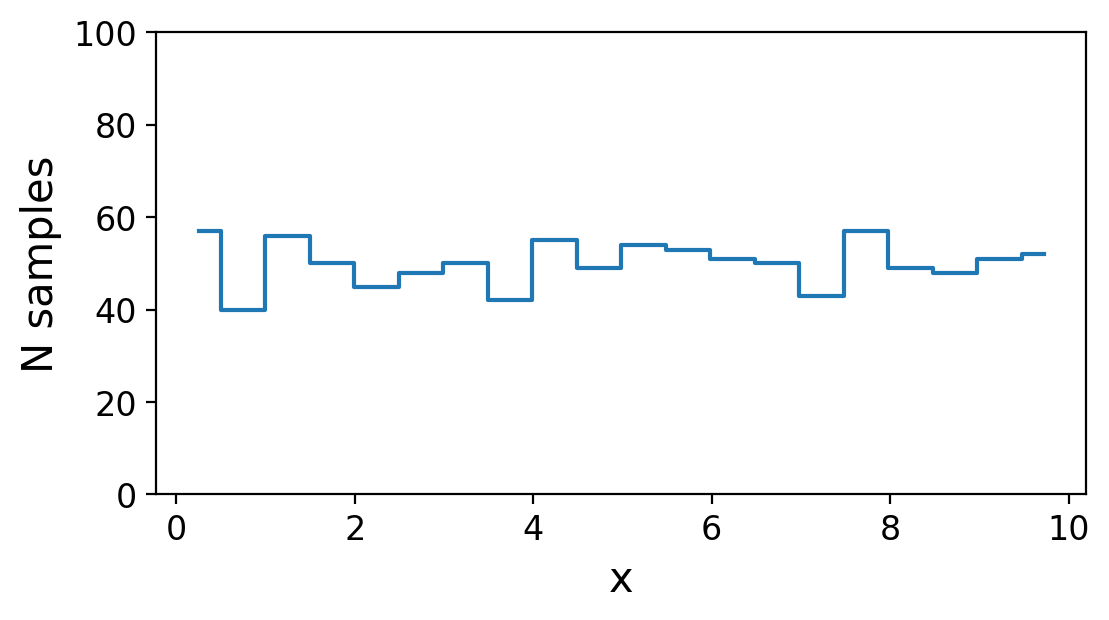

In [110]:
#>>>RUN: L1.2-runcell02

#Now let's make a histogram
histy, bin_edges = np.histogram(bkg, bins=20)
#print(histy,len(histy))
print(bin_edges,len(bin_edges))
print(bin_edges[1:],len(bin_edges[:-1]))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

                            
#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(6,3)) #optionally set the figure size here

#plot data and axes limits
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.ylim(0,100) #You will need to change this for a normal distribution
#ax.set_ylim([0,100]) #set the y-range of ax to be 0 to 100, if using ax

#plot labels and style
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('N samples', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<a name='exercises_1_2'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_2) | [Next Section](#section_1_3) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.2.1: Integral of a Histogram</span>

What is the integral of the histogram in the previous example, a uniform distribution sampled 1000 times? You can add to the code below to calculate your answer, or you may determine the result without computation.

Enter a number for your answer.

**Reminder:** Your final answers **must** always be submitted on MITx.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#Randomly choose 1000 events between 0 and 10
bkg = np.random.uniform(0,10, 1000) 
histy, bin_edges = np.histogram(bkg, bins=20)

integral = #complete the code

print("Integral:",integral)

In [ ]:
#>>>SOLUTION

#Randomly choose 1000 events between 0 and 10
bkg = np.random.uniform(0,10, 1000) 
histy, bin_edges = np.histogram(bkg, bins=20)

integral = np.sum(histy)

print("Integral:",integral)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
1000
</pre>
        
**EXPLANATION:**
    
The histogram as defined has counts of events as its y-axis, so the integral is just the total number of events generated, namely 1000.  
    
</div>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.2.2: Number of Bins</span>

The number of bins you choose for a histogram can have an outsized impact on its visual quality and information content. Poor quality can result from having both too many and too few bins. Below, we provide code to sample from a uniform distribution. Add code to plot a histogram of the samples, and try it with 3 bins, 10 bins, and 100 bins. You may find it easiest to copy and then edit lines from previous code cells. You might also want to try `matplotlib.pyplot.hist`.

Which number of bins produces the most sensible histogram: 3, 10, or 1000?

In [ ]:
#>>>EXERCISE
#Randomly choose 1000 events between 0 and 10, with set RNG seed
np.random.seed(0) # makes the random numbers stay the same between runs
samples = np.random.uniform(0, 10, 1000) 

# Below, write code to make a histogram, and try with 3, 10, and 1000 bins

In [ ]:
#>>>SOLUTION
#Randomly choose 1000 events between 0 and 10, with set RNG seed
np.random.seed(0)
samples = np.random.uniform(0, 10, 1000) 

# Below, write code to make a histogram, and try with 3, 10, and 1000 bins
nbins = 10
plt.hist(samples, bins=nbins, histtype='step') # a shortcut! In the end you'll want to use this.
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
10
</pre>
        
**EXPLANATION:**
    
As you hopefully noticed, choosing 1000 bins for 1000 events is not very effective. In each bin there are at most a few events and many bins are empty, so the histogram is noisy and it's hard to get a sense of its shape. Though using 3 bins gives a significant number of events in each one, with such low resolution it's unclear what the distribution really looks like. Many distinct distributions could correspond to that same 3 bin histogram.

Binning for histograms is thus a tradeoff, and in this case, 10 bins works the best of the three options listed.
    
</div>

#### Follow-up 1.2.2a (ungraded)
   
Sample a uniform distribution from 0 to 5 and plot it with 11 bins. Use the starting code below.

In [ ]:
#>>>FOLLOW-UP
# Use this cell for drafting your solution (if desired)

bkg = 0 #your code here
histy, bin_edges = 0 #your code here
#make sure to plot it with bin centers, not bin edges!
plt.show()

In [ ]:
#>>>SOLUTION

bkg = np.random.uniform(0,5, 1000) 
histy, bin_edges = np.histogram(bkg, bins=11)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

plt.show()

>#### Follow-up 1.2.2b (ungraded)
>   
>Change the code in `L1.2-runcell01`, so that you draw 1000 samples from a normal distribution. How is the histogram different? You may have to change some parameters of your plot to fit the data appropriately.

<!--start-block-->
<a name='section_1_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.3 Sampling events</h2>
    
| [Top](#section_1_0) | [Previous Section](#section_1_2) | [Exercises](#exercises_1_3) | [Next Section](#section_1_4) |

*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS1/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS1_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L01/slides1.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L1.2-slides

from IPython.display import IFrame

IFrame(src='https://mitx-8s50.github.io/slides/L01/slides1.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L01/slides1.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L01/slides1.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Overview</h3>

Let's try something a bit more complicated. In the following code, we are going to sample TWO random variables described by uniform (flat) distributions. Then, we'll define a new random variable that's the SUM of the two sampled values. The "observed" value of a random number (i.e., what you get when you sample a distribution) is also called a "realization".

In [ ]:
#>>>RUN: L1.3-runcell01

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 1000)
bkg2 = np.random.uniform(0,10, 1000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")


def getHist(data,useDensity=False):
    """Get hist y values, bin edges, and bin centers as np arrays"""
    histy, bin_edges = np.histogram(data, bins=100,density=useDensity) #<==== Note the density here that turns it into a pdf
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    print("int:",np.sum(histy*(bin_edges[1:] - bin_edges[:-1])))#p(x)*dx
    return (histy, bin_edges, bin_centers)

def plotData(data,useDensity=False):
    #plotting-------------------
    #plot size
    #fig, ax = plt.subplots(figsize=(9,6)) #optionally set the figure size here
    
    #plot data
    histy, bin_edges, bin_centers = getHist(data,useDensity)
    plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
    
    #plot labels and style
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('N samples', fontsize=15) #Label y
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

def plotDataNormalized(data):
    histy, bin_edges, bin_centers = getHist(data)
    # normalize the hist y values to the total number of samples (integral)
    integral = len(data)
    norm_histy = histy / integral # again, division is broadcast to elements of histy
    plt.plot(bin_centers,norm_histy,drawstyle = 'steps-mid')
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('Relative probability', fontsize=15) #Label y
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plotData(data,False)
#plotDataNormalized(data)

So, what distribution are we sampling when we generate this new random variable? 

Let's derive it analytically. However, before we do that, let's first define a few statistical quantities. When these quantities are calculated for a specific sample of events, they are called "observables". 

To understand this, we need to define a probability distribution function, or "PDF". By definition, the integral of a PDF is always equal to 1. 

When we sample a uniform distribution from 0 to 10, we are sampling random numbers in that range. We can characterize the process of taking a random sample of a PDF $p(x)$ by defining the probability $P_{ab}(X)$ that a number is sampled between $a$ and $b$ as: 

$$P_{ab}(X)=\int_{a}^{b}p(x)dx$$

or, in other words, the probability is given by the integral of $p(x)$ over that range. As expected, the probability of observing a number within the entire range of the PDF will always equal 1. 

$$1=\int_{-\infty}^{\infty}p(x)dx$$

For a flat distribution from a to b, $p(x)$ is given by:

$$p_{flat}(x)=\frac{1}{b-a}$$  

To check this, let's just count events in our range. If we restrict our range to $x_{min} < x < x_{max}$ (where $x_{min}\gt a$ and $x_{max} \lt b$), the probability will then be 

$$\int_{x_{min}}^{x_{max}}\frac{1}{b-a}dx = \frac{x_{max}-x_{min}}{b-a}$$

Let's check this "ideal" probability by doing an "observation" of the probability.

In [ ]:
#>>>RUN: L1.3-runcell02

#define a=xmin and b=xmax
xmin=2
xmax=5

#sample
bkg1 = np.random.uniform(0,10, 10000)
#now count
prob=0
total=0
for x in bkg1:
    total+=1
    if x > xmin and x < xmax :
        prob+=1
        
print("Probability that we are between a and b is: ",prob/total, "true probability is:",(xmax-xmin)/10)

So, we see that we get a number very close to the expected value. It is not exact, because now we are dealing with sampled events. We will get back to the lack of exactness later on. For now, try varying the number of samples to see how the difference from the true value changes.  

Now, in addition to having a PDF, we can define something called the cumulative distribution function (CDF). This function is similar to the probability, except we integrate one end of the PDF from negative infinity. 

$$\mathrm{CDF}(x)=\int_{-\infty}^{x} p(u)du$$

This is now a function of $x$ that involves an integral over the PDF. Defined this way, the CDF for a given $x$ is the total probability that lies in values below that $x$. It can also be defined the opposite way, accounting for total probability of values above the $x$.

Let's display PDFs and their associated CDFs using the `scipy.stats` module, for both the uniform and normal distributions. The normal distribution will be studied in detail later on. 

In [ ]:
#>>>RUN: L1.3-runcell03

def plot_pdf_cdf_uniform(x):
    #plotting-------------------
    #plot size
    fig, ax = plt.subplots(figsize=(9,6))

    #plot data
    ax.plot(x, stats.uniform.pdf(x), 'k-', lw=2, label='PDF')  # PDF of a standard uniform distribution
    ax.plot(x, stats.uniform.cdf(x), 'k--', lw=2, label='CDF')  # CDF of a standard uniform distribution

    #plot labels and style
    plt.title("PDF and CDF of a standard uniform distribution", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

x = np.linspace(-2,2,100)
plot_pdf_cdf_uniform(x)

In [ ]:
#>>>RUN: L1.3-runcell04

def plot_pdf_cdf_normal(x):
    #plotting-------------------
    #plot size
    fig, ax = plt.subplots(figsize=(9,6))

    #plot data
    ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, label='PDF')  # PDF of a standard normal distribution
    ax.plot(x, stats.norm.cdf(x), 'k--', lw=2, label='CDF')  # CDF of a standard normal distribution

    #plot labels and style
    plt.title("PDF and CDF of a standard normal distribution", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
x = np.linspace(-5,5,100)
plot_pdf_cdf_normal(x)

<a name='exercises_1_3'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_3) | [Next Section](#section_1_4) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.3.1: PDF and CDF</span>

For any valid (i.e. corresponding to some possible probability distribution) PDF, what is the maximum value of its corresponding CDF? Enter a number.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
1
</pre>
        
**EXPLANATION:**
    
To be a valid probability distribution, summing (integrating) the probabilities over all values of `x` must yield exactly 1. Since this sum (integration) is the definition of a CDF, its value approaches 1 when taking $x\to\infty$.

</div>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.3.2: Sum of Two Distributions</span>

Consider two arrays of uniformly distributed data, each with 10,000 points (as shown in the code below). What is the integral of the array which is the sum of these two arrays?  Enter a number.

**Reminder:** Your final answers **must** always be submitted on MITx.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")

#your code here

In [ ]:
#>>>SOLUTION

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")

#The integral is just the length (10k)
integral = len(data)
print(integral)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
10000
</pre>
        
**EXPLANATION:**
    
The integral is just the number of events in the array. Adding two arrays with 10000 entries yields a third array which also has 10000 entries.
    
</div>

<!--start-block-->
<a name='section_1_4'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.4 Expectation and Variance</h2>

| [Top](#section_1_0) | [Previous Section](#section_1_3) | [Exercises](#exercises_1_4) | [Next Section](#section_1_5) |

*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS1/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS1_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Definitions</h3>

We can use PDFs to define the expectation $E[x]$ for a continuous variable,

$$E[x]=\int_{-\infty}^{\infty}xp(x)dx$$

or, in other words, the value of $x$ weighted by its PDF. This is also commonly referred to as the mean or average of the distribution. 

Furthermore, we can also define the variance of this distribution, as: 

$$V[x]=\int_{-\infty}^{\infty}\left(x-E[x]\right)^{2}p(x)dx$$

or, in other words, the spread of the numbers about the mean of the distribution. The variance holds an important interpretation. It is a measure of the width of our distribution, and we often use this as a way to describe the uncertainty of our measurement. Uncertainty is simply defined to be the square root of the above, $\sqrt{V(x)}$, which we refer to as the standard deviation $\sigma$. We will clarify this interpretation more in a later section. 

$$\sigma=\sqrt{V(x)}$$

You will often see the standard deviation called the root mean squared, or RMS.

<br>

<h3>Example of Computing Mean and Variance</h3>

Let's estimate the mean and variance of a flat (i.e., uniform) distribution by using a sample of data points. 

The formulas given above apply to finding exact statistical properties of a known distribution. However, they can also be applied to finding these properties for a data sample. Suppose we have ${N_\mathrm{samples}}$ data points and we pick out one arbitrary data point. All the data points have an equal probability of being selected, so there is a probability $p(x)=\frac{1}{N_\mathrm{samples}}$ that we pick a specific one.

Note that this probability is independent of what distribution the points were sampled from. We can use this PDF with the formulas above to calculate the mean and variance. Of course, for a set of discrete values of $x$, we need to do a sum, not an integral.

You can see that using this $p(x)$ and a sum for the expectation value, you are just doing the usual procedure for calculating an average of any set of numbers.

In [ ]:
#>>>RUN: L1.4-runcell01

#Again another exercise

#sample
nsamples=10000
bkg1 = np.random.uniform(0,10, nsamples)

#mean
mean=0
prob=1./nsamples
for x in bkg1:
    mean+=x*prob
print("Mean: ",mean)

#Now we can do the variance
var=0
for x in bkg1:
    var+=(x-mean)*(x-mean)*prob
print("Var: ",var)

#Now we can do it the fast way, using intrinsic numpy functions
print("Mean:",bkg1.mean(),"Variance:",bkg1.var())

<a name='exercises_1_4'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_4) | [Next Section](#section_1_5) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.4.1: Mean of Uniform Distribution</span>

Compute the "ideal" value of the mean (i.e., the average) of a uniform distribution from 0 to 5. You may do this analytically or by augmenting the code above.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
2.5
</pre>
        
**EXPLANATION:**
    
The mean of a uniform distribution over the range $[a,b]$ is $(a+b)/2$.

    
</div>

>#### Follow-up 1.4.1a (ungraded)
>   
>Compute the mean and variance of a uniform distribution from 0 to 5 by taking 1000 random samples. Use the starting code below.

In [ ]:
#>>>FOLLOW-UP
# Use this cell for drafting your solution (if desired)

def uniform_mean(start, end, num_points):
    mean_val = 0 # your code here
    return mean_val

def uniform_variance(start, end, num_points):
    var_val = 0 # your code here
    return var_val

In [ ]:
#>>>SOLUTION

import numpy as np


def uniform_mean(istart, iend, inum_points):
    mean_val = np.random.uniform(istart, iend, inum_points).mean()
    return mean_val

def uniform_var(istart, iend, inum_points):
    var_val = np.random.uniform(istart, iend, inum_points).var()
    return var_val


start = 0
end = 5
num_points = 1000

print(uniform_mean(start, end, num_points))
print(uniform_var(start, end, num_points))

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

        
**EXPLANATION:**
    
Create a uniform, random distribution using np.random.uniform. The mean and variance are simply `array.mean()` and `array.var()`.
    
</div>

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.4.2: Mean and Variance of a Uniform Distribution</span>

Calculate analytically the mean and variance for a uniform distribution in the following ranges:

(a) 0 to 2;
(b) 0 to 5;
(c) 0 to 10;
(d) 0 to 20

What is the trend in mean (expectation) and variance, from (a) to (d)? Choose from the options below:

- mean decreasing, variance decreasing
- mean decreasing, variance increasing
- mean increasing, variance decreasing
- mean increasing, variance increasing

You may want to get a general formula. Alternatively, use large samples (>1000 events) from these distributions to computationally estimate the mean and variances (starting code below).
    
Whichever method you chose, you are encouraged to look at the solution after you submit your answer to make sure you understand how this works analytically. 

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np

# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = 0 #YOUR CODE HERE

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")

In [ ]:
#>>>SOLUTION

import numpy as np

# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = [(np.mean(samples), np.var(samples)) for samples in samples_list]

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Mean increasing, variance increasing.
</pre>
        
**EXPLANATION:**

*Analytical*

Suppose we have a uniform distribution on the interval $[0, A]$. This distribution is symmetric. This allows us to intuit that the mean should be $E[x] = A/2$. Explicitly,

$$
\begin{equation}
E[x] = \int_{-\infty}^{\infty} x p(x)\, dx
\end{equation}
$$
    
where for our flat distribution

$$
\begin{equation}
p(x) = \frac{1}{A}\quad\text{for}\quad x\in [0, A]\quad\text{and}\quad 0\quad\text{elsewhere}
\end{equation}
$$
    
Substituting in,

$$
\begin{equation}
E[x] = \int_0^A \frac{x}{A}\, dx = \frac{1}{A}\left.\left(\frac{x^2}{2}\right)\right|_0^A = \frac{A}{2}
\end{equation}
$$
    
For the variance, we could similarly calculate the integral given in the preceding section. However, here I'll introduce another equivalent formula that's easier since we already have $E[x]$. This can be derived from viewing our integral formula for $V[x]$ as $E[(x-E[x])^2]$. The result is

$$
\begin{equation}
V[x] = E[x^2] - (E[x])^2
\end{equation}
$$
    
So, we want to calculate $E[x^2]$.

$$
\begin{equation}
E[x^2] = \int_{-\infty}^{\infty} x^2 p(x) = \int_0^A\frac{x^2}{A}\,dx = \frac{1}{A}\left.\left(\frac{x^3}{3}\right)\right|_0^A = \frac{A^2}{3}
\end{equation}
$$
    
and thus

$$
\begin{equation}
V[x] = \frac{A^2}{3} - \frac{A^2}{4} = \frac{A^2}{12}
\end{equation}
$$
    
*Computational*

Perhaps you can see that this approach is less tedious if you're comfortable programming and can accept inexact answers. It also can work in cases where the distribution is not easy to work with analytically.
    
<pre>
# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = [(np.mean(samples), np.var(samples)) for samples in samples_list]

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")
</pre>
    
</div>

<!--start-block-->
<a name='section_1_5'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.5 Sum of Two Distributions Continued</h2>

| [Top](#section_1_0) | [Previous Section](#section_1_4) | [Exercises](#exercises_1_5) | [Next Section](#section_1_6) |

<h3>Back to the sum distribution!</h3>

Finally, we're ready to see what distribution results from summing realizations of two uniform distributions. Let's first turn a uniform distribution from 0 to 10 into a PDF. For this we know that the function is flat between 0 and 10, and zero otherwise. Consequently $f(x)=a$ when $x\in[0,10]$, and 

$$
\begin{equation}
1=\int_{0}^{10}adx=ax|_{0}^{10}=10a\\
a=\frac{1}{10}
\end{equation}
$$

As a quick check, we find the expectation of this distribution is 

$$
\begin{equation}
E[x]=\int_{0}^{10}axdx=\frac{1}{2}ax^2|_{0}^{10}=50a\\
E[x]=5
\end{equation}
$$

Now, let's consider sampling this distribution twice. If we get a result $x^\prime=x_{1}+x_{2}$, there are a broad range of possible values for $x_{1}$ and $x_{2}$ for a fixed $x^{\prime}$. Let's say $x^{\prime}=10$ then it could be that one sample $x_{1}=5$ and the other sample $x_{2}=5$ or it could be that $x_{1}=10$ and $x_{2}=0$. To get all the possible values for $x^{\prime}=10$ we need to compute the expectation over all possibilities. This is equivalent imposing a constraint that $x^{\prime}=x_{1}+x_{2}\rightarrow x_{2}=x^{\prime}-x_{1}$. 

The best way to think about this is as a 2D distribution. Let's make a plot of this. 

In [ ]:
#>>>RUN: L1.5-runcell01

bkg1 = np.random.uniform(0,10, 100)
bkg2 = np.random.uniform(0,10, 100)

#Now we sum them
data = bkg1+bkg2

#now let's fix x' to be 10, this means only bkg1 is an independent variable
val=10-bkg1

#now let's plot them
#plotting-------------------
#plot data
plt.scatter(bkg1,bkg2, label="x1, x2 independently sampled")
plt.scatter(bkg1,val, label="x' = x1 + x2 = 10")

#plot labels and style
plt.legend(fontsize=15)
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

So when we fix $x^{\prime}$ and sample events, that is equivalent to just drawing a line on the 2D plot. Now, if we think of this distribution as a 2D probability distribution function, we can write. 

$$
\begin{eqnarray}
P(x_{1},x_{2})&=&\int_{x_1^\mathrm{min}}^{x_1^\mathrm{max}} \int_{x_2^\mathrm{min}}^{x_2^\mathrm{max}}p(x_{1})p(x_{2})dx_{1}dx_{2}
\end{eqnarray}
$$

with the probability $P$ now defined as a 2D integral. In this case, we treated it as 2 independent probability distributions $p(x_{1})$ and $p(x_{2})$. In reality this function can be a function of both variables $p(x_{1},x_{2})$. We can now simplify this distribution into a 1D distribution by integrating over the line where $x^{\prime}=x_1+x_2$


$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=&\int_{-\infty}^{\infty}p(x_{1})p(x^\prime-x_{1})dx_{1}
\end{eqnarray}
$$

For this, we have then 

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=& \int_{0}^{10}\frac{1}{a}p(x^\prime-x_{1})dx_{1}\\
\end{eqnarray}
$$

We have to deal with two cases separately. One is where $x^{\prime} \geq 10$, and so the smaller number cannot go down to zero, but only to a minimum of $x^{\prime}-10$ (the max number would be 10 in this case). The other case is where $x^{\prime} \lt 10$ and so the larger number cannot exceed $x^{\prime}$ (the min number would be 0 in this case). Expanding this out gives us:

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2}) &=&\int_{x^\prime-10}^{10}\frac{1}{a^2}dx_{1}~\forall x^\prime \geq 10\\
&=&\frac{20-x^\prime}{a^2}~\forall x^\prime \geq 10\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2}) &=&\int_0^{x^{\prime}}\frac{1}{a^2}dx_{1}~\forall x^\prime < 10\\
&=&\frac{x^\prime}{a^2}~\forall x^\prime < 10\\
\end{eqnarray}
$$

Or, in other words, the probability of finding a particular value of $x^\prime$ is a line sloping up from 0 when we are below 10, and then sloping back down to 0 when we are above 10. To verify that this is a full PDF we can check the normalization:

$$
\begin{eqnarray}
\int_{-\infty}^{\infty}p(x^\prime)dx^{\prime}&=&\frac{x^2}{2a^2}|^{10}_{0}+\frac{20x-x^2/2}{a^2}|^{20}_{10}\\
&=&\frac{100}{200}+\frac{400-200}{100}-\frac{200-50}{100}\\
&=&\frac{1}{2}+\frac{200-150}{100}\\
&=&1
\end{eqnarray}
$$

The nice thing about computers is we don't need to do all these integrals to get these lines. Finally, let's actually plot all of these on the same plot! We now have a histogram and a function. 

The one tricky component in the above formula is that we want to compare a distribution with a histogram, so we need to ensure that the integrals are the same over each region.  

To make sure they are the same, lets pick a specific bin with minimum $x_{min}$ and maximum $x_{max}$.  Ensuring the integrals per bin are the same means that for each bin the values need to be the same or in other words

$$
\begin{equation}
N^{\rm bin}_\mathrm{samples} = \int_{x_\mathrm{min}}^{x_\mathrm{max}} C p(x) dx\approx C p(x)\left(x_\mathrm{max}-x_\mathrm{min}\right) = C p(x)\Delta x
\end{equation}
$$

Now, for a distribution, we can write $\Delta x=\frac{x_\mathrm{max}-x_\mathrm{min}}{N_\mathrm{bins}}$. Additionally, if we sum all bins, we have 

$$
\begin{eqnarray}
N_{\rm samples} & = & \sum_{i=1}^{N} C p(x_{i}) \Delta x \\
N_{\rm samples} & = & C   \sum_{i=1}^{N}  p(x_{i}) \Delta x \\ 
N_{\rm samples} & = & C    \\ 
\end{eqnarray}
$$

Then, we can write our normalization term per bin as $N_{samples}\Delta x$. Thus, per bin we write our function as

$$
\begin{equation}
f(x)= p(x) N_{\rm samples} \Delta x 
\end{equation}
$$

In [ ]:
#>>>RUN: L1.5-runcell02

#Let's first add our numbers
nsamples=1000
bkg1 = np.random.uniform(0,10, nsamples)
bkg2 = np.random.uniform(0,10, nsamples)
data = bkg1+bkg2
nbins=100

#now we make a histogram
histy, bin_edges = np.histogram(data, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Now let's define our function. 
def function(ix,ntot=nsamples,inbins=nbins):#note the norm is for n bins over 0-20
    if ix < 10:
        return ntot*(20/inbins)*(ix/100)
    else: 
        return ntot*(20/inbins)*(20-ix)/100

def functionnp(ix,ntot=nsamples,inbins=nbins):#note the norm is for n bins over 0-20
    return np.where(ix < 10,ntot*(20/inbins)*(ix/100),ntot*(20/inbins)*(20-ix)/100 )
    
#We need to evaluate the function, so we do it like this
x = np.linspace(start=0, stop=20, num=100)
#this list(map) is just a trick to run this function on all elements in the array
#y = np.array(list(map(function, x)))
y = functionnp(x) #this just uses numpy


#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data
plt.plot(x, y,label='analytic PDF')
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

#plot labels and style
plt.xlabel('x1+x2', fontsize=15) #Label x
plt.ylabel('$N_\mathrm{samples}$/bin', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Now, to understand the power of sampling, let's make a much more complicated function based on sampling, and let's see what this more complicated function looks like. 

In [ ]:
#>>>RUN: L1.5-runcell03

#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000) # a random like before
bkg2 = np.random.normal (5,2 , 10000) # a gaussian distribution centered about 2 with width 5
data = bkg1+bkg2


#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data and axes limits
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])

#plot labels and style
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The point of this is that we can put sample events from any distribution we want, and make very complicated distributions that have all sorts of features. Instead of going through the analytical calculations to figure out what these distributions look like, we can simply sample!

<a name='exercises_1_5'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_5) | [Next Section](#section_1_6) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.5.1: Generalizing the Sum Distribution</span>

Let's generalize the sum distribution. Compute the sum of 3 random variables that are distributed uniformly between 0 and 1 (draw 10000 samples, as was done abobe). Plot the histogram of this sum, as was done above. Try the sum of 4 random variables.

How does the sum distribution behave as we scale to N uniform random variables? Choose from the options below:

- it looks like a uniform distribtion
- it looks like a sharper triangle shape
- it looks like a normal distribution

In [ ]:
#>>>SOLUTION

#(computational)
# Get 4000 samples from each of N uniform random variables on [0,1]
N = 50
samples_list = [np.random.uniform(0,1,4000) for i in range(N)] # list of N numpy arrays

# add the realizations
sum_of_realizations = np.zeros(4000) # empty array to start
for samples in samples_list:
   sum_of_realizations += samples

# histogram with 20 bins
plt.hist(sum_of_realizations, bins=20)
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
As `N` get larger, the sum distribution starts looking smoother and begins to resemble a normal distribution.
</pre>
        
**EXPLANATION:**

This is curious! Eventually we will bring up the Central Limit Theorem, which accounts for this phenomenon.
</div>

<!--start-block-->
<a name='section_1_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.6 Generalizing to Many Measurements</h2>
    
| [Top](#section_1_0) | [Previous Section](#section_1_5) | [Exercises](#exercises_1_6) |


<h3>Overview</h3>

Let's consider a set of measurements. Like we had with the two variables, if we take $N$ measurements, we can treat them as $N$ separate variables. Often the measurements can be sampled from the same distribution (like we had for the above case). 

Typically, we treat these measurements as independent variables. This means that the result of any one of the measurement doesn't affect the results of any of the other measurements. The probability distributions of these is similar to the case above where we had two measurements $x_{1}$ and $x_{2}$.  Like the 2D probability distribution we had before, we now have $N$ variables, yielding an $N$ dimensional distribution. Yes, this is complicated! But, it won't get too scary. 

To deal with this very high dimensional space, we can define the joint PDF distribution of these as the multiplication of the individual PDFs. For two independent measurements it's:

$$
\begin{equation}
p(x_{1},x_{2})=p(x_{1})p(x_{2}) \\
\end{equation}
$$

For $N$ independent measurements it is, 

$$
\begin{equation}
p(x_{1},...,x_{N})=\prod_{i=1}^{i=N}p(x_{i})
\end{equation}
$$

Let's visualize some measurements sampled from the same distribution. We will take two measurements, $x_{1}$ and $x_{2}$, and, because we can, we will run this experiment 1000 times. To perform this experiment, we will use a normal distribution, which is defined as 

$$
\begin{equation}
\mathcal{N}(x; \mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
$$

where $\mu$ and $\sigma$ are the mean and standard deviation, respectively, of the distribution and the fraction before the exponential is required for the integral of the distribution to equal 1.

This is a distribution that we will use quite extensively in this course.     

In [ ]:
#>>>RUN: L1.6-runcell01

#Let's first add our numbers
nsamples=1000
mu=0
sigma=1
x1 = np.random.normal(mu,sigma, nsamples)
x2 = np.random.normal(mu,sigma, nsamples)

#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(6,6)) #a square plot size is more useful for this data

#plot data and axes limits
plt.scatter(x1,x2,)
plt.xlim(-4,4)
plt.ylim(-4,4)

#plot labels and style
plt.title("Joint PDF of two normal distributions", fontsize=15)
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Now, from this setup, we can define a bunch of variables that help to understand the data. We call the variables that we define "observables" or data summaries. Let's list the definition of these variables, and then we will go ahead and see what we can do with them. First, we define the mean $\bar{x}$ of our *sample* (not necessarily of the distribution). 

$$
\begin{equation}
\bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_{i}
\end{equation}
$$

To be clear, this is an observable, (i.e., a calculation), that we perform on the data that we have at hand. 

We can then compute the expectation of $\bar{x}$ for our sampled distribution. This expectation gives us: 

$$
\begin{eqnarray}
E[\bar{x}]&=&\int \left(\frac{1}{N}\sum_{j=1}^{N} x_{j}\right)\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\\
          &=&\frac{1}{N}\sum_{j=1}^{N}\left(\int x_{j}\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\right)\\
          &=&\frac{1}{N}\times N \int x_{i} p(x_{i}) dx_{i}\\
E[\bar{x}]&=&E[x]\\
\end{eqnarray}
$$

Or, on average, our sample mean $\bar{x}$ will be the mean of the distribution. 

Now, we can define the variance of the data in a similar way

$$
\begin{equation}
V(x)=\frac{1}{N}\sum_{i=1}^{N} (x_{i}-\bar{x})^{2}
\end{equation}
$$

Note that the form above is very similar to the variance of a distribution, defined by

$$
\begin{eqnarray}
E\left[V(x)\right]&=&\frac{1}{N}\int_{-\infty}^{\infty}
\left(\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}\right)\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E\left[V(x)\right]&=&\frac{1}{N}\sum_{i=1}^{N}\int_{-\infty}^{\infty}\left(x_{i}-\bar{x}\right)^{2} p(x_{i}) dx_{i}\\
E\left[V(x)\right]&=&\frac{N}{N}E[(x-\bar{x})^2]\\
E\left[V(x)\right]&=&V(x)\\
\end{eqnarray}
$$

And now we can consider the variance of these distributions. Let's do the variance of our defined $\bar{x}$. First let's derive it for just one variable. 

$$
\begin{eqnarray}
V\left[\bar{x}\right]&=&\int (x_i-\bar{x})^2 p(x_i)dx_i\\
                     &=&\int (x^2_i-2x_{i}\bar{x}+\bar{x}^2) p(x_i)dx_i\\
                     &=&\int x^2_i p(x_i)dx_i - 2\bar{x}^2+\bar{x}^2\\
                     &=&\int x^2_i p(x_i)dx_i -  \bar{x}^2\\
                     &=&\int (x^2_i-\bar{x}^2) p(x_i)dx_i  
\end{eqnarray}
$$

Now, let's generalize this whole thing to $N$ measurements. I would like to warn you that this is a complicated calculation; it's not the focus of this course, but it's here for completeness.

$$
\begin{eqnarray}
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\sum_{i=1}^{N} x_{i}-\bar{x}\right)^{2} \Pi_{i=0}^{i=N}p(x_{i}) dx_{i} \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2-2N\left(\sum_{i=1}^{N} x_{i}\right)\bar{x}+ N^2\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2\right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\frac{2}{N}\bar{x}N\bar{x}+\bar{x}^2 \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)\left(\sum_{i=1}^{N} x_{i}\right) \right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 + 2\sum_{i}\sum_{j\neq i}x_{i}x_{j} \right) \Pi_{i=0}^{i=N}p(x_{i}) c-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{1}{N}\bar{x}^2 + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \int \left(\frac{1}{N}\right)  \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right)  \left(\frac{1}{N}\right) N  \left(\int x_{i}^2 p(x_{i}) dx_{i} -\bar{x}^2\right) \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \left(\frac{1}{N}\right)N V(x) \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) V(x) \\
\end{eqnarray}
$$

where $V(x)$ is the variance of any distribution. This is very important. What this means is that if we sample many times a distribution with a variance $\sigma^2$, we have that the variance of the average over this distribution scales as $\frac{1}{N}$ times the variance of the sampled distribution. This means that if you are measuring the mean, the uncertainty on the mean scales as the $\sqrt{V[\bar{x}]}=\sqrt{\frac{1}{N}V[x]}$. 

We will state without proof that the variance scales in a similar way. 


$$
\begin{eqnarray}
V\left[V(\bar{x})\right]&=&\left(\frac{1}{2N}\right) V(x) \\
\end{eqnarray}
$$

To understand how this works, let's run some toy calculations. 

<br>
<!--end-block-->

In [ ]:
#>>>RUN: L1.6-runcell02

import math

#define a function that samples a normal distribution N times and then returns mean and root mean-square rms 
#(also known as standard deviation, the square root of variance)
def sample(iN,imean,istdev):
    sample = np.random.normal(imean,istdev,iN)
    return sample.mean(),sample.std()

#This function runs 100 tests where we sample N times, we call these toys
def meansample(iN,imean,istdev):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN,imean,istdev)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()


def get_sim_mean_rms(isamples,imean,istdev):
  nvar=np.array([])
  mean=np.array([])
  rms=np.array([])

  distmean=np.array([])
  distrms=np.array([])


  #Now we iterate from 1 to 250 in sampling and compute mean and RMS
  for i0 in range(isamples):
      nvar = np.append(nvar,i0)

      #Sample just once 
      pMean,pRMS=sample(i0,imean,istdev)
      distmean = np.append(distmean,pMean)
      distrms  = np.append(distrms,pRMS)

      #sample many times
      pMean,pRMS=meansample(i0,imean,istdev)
      mean = np.append(mean,pMean)
      rms  = np.append(rms,pRMS)
    
  return nvar, distmean, mean, distrms, rms


isamples,imean,istdev = [250,0,1]
nvar, distmean, mean, distrms, rms = get_sim_mean_rms(isamples,imean,istdev)


# plt.plot(nvar,funcmean,'--',label='func rms of mean')
# plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='mean')
plt.plot(nvar,distrms,label='rms')
plt.plot(nvar,mean,label='rms of mean')
plt.plot(nvar,rms + np.ones(len(rms)),label='rms of rms') # Add 1 to the rms to separate these two quantities in the plot
plt.legend(loc='lower right')
plt.xlabel("Number of samples")
plt.show()

As you can see from the plot, the mean and rms of a single sample fluctuate a lot for small sample sizes, a fact that is quantified by the relatively large standard deviations (rms) of those two observables. As we increase the size of the samples, the rms of the mean and the rms of the rms decrease asymptotically  (don't forget that the rms of the rms is increased by 1 on the plot for clarity). This same effect is seen in the reduced fluctuations in the values of the mean and rms for single samples.

This means that with larger samples, we can be more confident in our measurement of the distribution's mean and rms. Note that the shape of the decrease of the two variances matches quite well the prediction of $1/\sqrt{N}$ and $1/ \sqrt{2N}$ scaling for the rms of the mean and rms, respectively (recall that the rms or standard deviation is the square root of the variance).

<a name='exercises_1_6'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_6) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.6.1: Variance of the Mean and Variance of the Variance</span>

We know that the variance and mean for a normal distribution are 

$$
\begin{eqnarray}
E(\mathcal N(x; \mu,\sigma)) & = & \mu \\
V(\mathcal N(x; \mu,\sigma)) & = & \sigma^2 \\
\end{eqnarray}
$$

Now we wish to derive a functional form for $\sqrt{V[\bar{x}]}$ (the rms of the mean) and $\sqrt{V\left[(x-\bar{x})^2\right]}$ (the rms of the rms), and compare with simulated data.

Write a function that accepts an array and returns the rms of the mean and the rms of the rms.

**Reminder:** Your final answers **must** always be submitted on MITx.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.


def func_rms_mean(isample_array,imean,istdev):
    rms_mean = 0. #complete the function
    return rms_mean
    

def func_rms_rms(isample_array,imean,istdev):
    #this is a piecewise function with rms=0 for isample[i]=1
    rms_rms = 0. #complete the function
    return np.where(isample_array <=1, 0, rms_rms)


In [ ]:
#>>>SOLUTION

def func_rms_mean(isample_array,imean,istdev):
    rms_mean = istdev/np.sqrt(isample_array)
    return rms_mean
    

def func_rms_rms(isample_array,imean,istdev):
    #this is a piecewise function with rms=0 for isample[i]=1
    rms_rms = istdev/np.sqrt(2*(isample_array))
    return np.where(isample_array <=1, 0, rms_rms)


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**EXPLANATION:**
    
For this, we just need to know that 

$$ V[\bar{x}] = \frac{1}{N} V[x] = \frac{\sigma^2}{N} $$ 

and

$$ V[(x-\bar{x})^2] = \frac{1}{2N} V[x] = \frac{\sigma^2}{2N}  $$ 
    
</div>

>#### Follow-up 1.6.1a (ungraded)
>
>Plot the functions that correspond to the rms of the mean and the rms of the rms, and compare these predictions with the results from simulated data.

In [ ]:
#>>>FOLLOW-UP
# Run this cell as follow-up to the previous exercise.

#make plots
#####################
def get_new_func_mean_rms(isamples,imean,istdev):
    sample_array = np.arange(1,isamples+1,1)
    
    funcrmsmean = func_rms_mean(sample_array,imean,istdev)
    funcrmsrms = func_rms_rms(sample_array,imean,istdev)
    return funcrmsmean, funcrmsrms


isamples,imean,istdev = [250,0,1]
nvar, mean_mean, rms_mean, mean_rms, rms_rms = get_sim_mean_rms(isamples,imean,istdev)
funcrmsmean, funcrmsrms = get_new_func_mean_rms(isamples,imean,istdev)



def plot_mean_and_rms_mean_vals():
    plt.errorbar(nvar,mean_mean,yerr=rms_mean, ecolor='red', label='mean and rms of mean')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return


def plot_rms_mean_vals():
    plt.plot(nvar,rms_mean,label='rms of mean')
    plt.plot(nvar,funcrmsmean,'--',label='func rms of mean')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return

def plot_rms_rms_vals():
    plt.plot(nvar,rms_rms,label='rms of rms')
    plt.plot(nvar,funcrmsrms,'--',label='func rms of rms')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return

def plot_residuals():
    plt.plot(nvar,funcrmsmean - rms_mean,'--',label='func rms of mean residuals')
    plt.plot(nvar,funcrmsrms - rms_rms,'--',label='func rms of rms residuals')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return


plot_mean_and_rms_mean_vals()
plot_rms_mean_vals()
plot_rms_rms_vals()
plot_residuals()

>#### Follow-up 1.6.1b (ungraded)
>   
>Sample a normal distribution of mean 1 and variance $\sigma$ with an increasing number of events, N. What do you observe as the trend of this distribution as a function of N?

